<a href="https://colab.research.google.com/github/naurazhaf/TA-PCD/blob/main/TA-PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.applications import MobileNetV2,InceptionResNetV2,VGG16
from keras.utils.image_utils import array_to_img,img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,shear_range=0.3,horizontal_flip=True,brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

In [ ]:
#Creating Batch size and Image shape
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [ ]:
#Defining Train, Test and Validation data
train_data=train_datagen.flow_from_directory("/content/drive/MyDrive/S6/TA/dataset/train",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

test_data=train_datagen.flow_from_directory("/content/drive/MyDrive/S6/TA/dataset/test",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory("/content/drive/MyDrive/S6/TA/dataset/train",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

Found 287 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
Found 287 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'riped': 0, 'unriped': 1}

In [ ]:
#Dictionary with key and correct values as labels
image_class_dict={0:'riped',
 1:'unriped'}

In [ ]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])

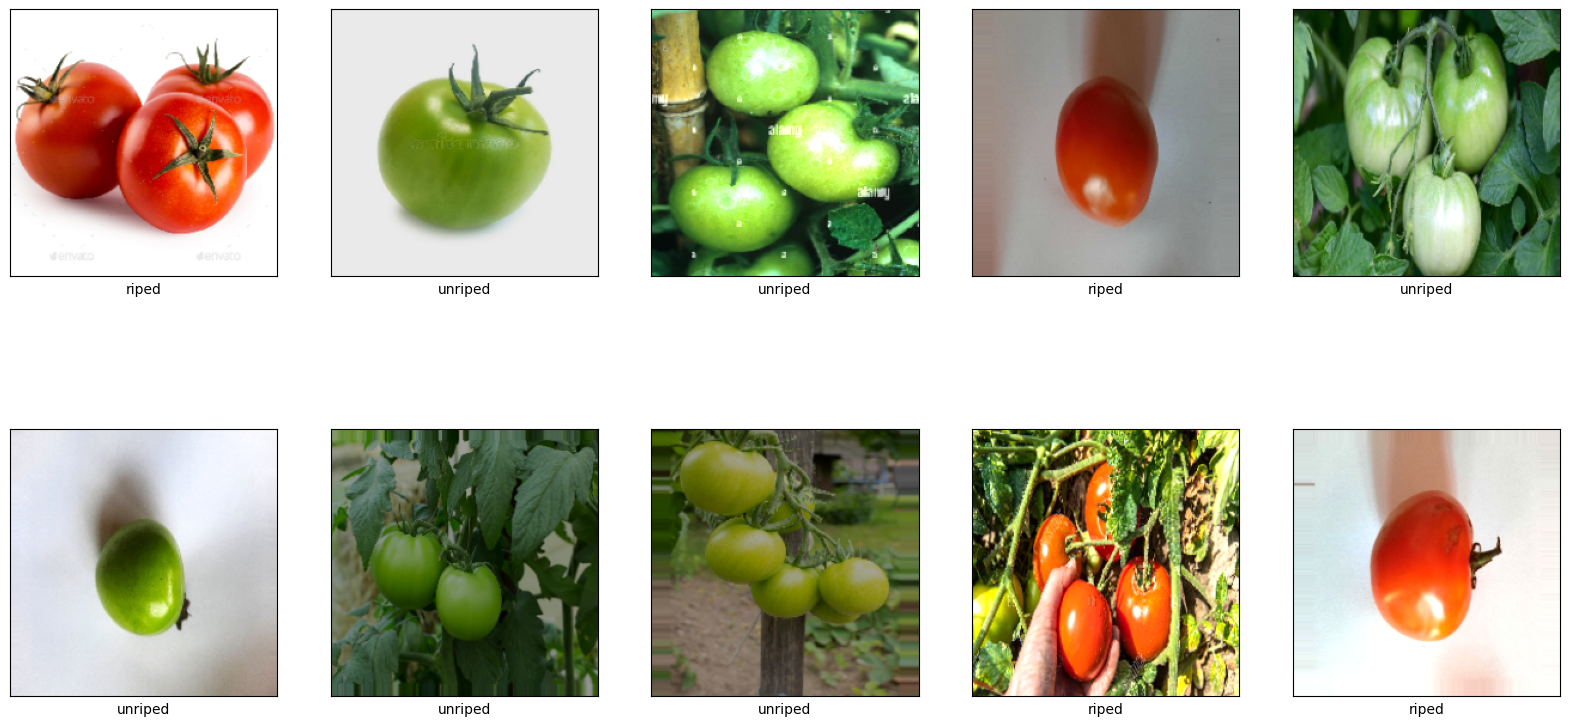

In [ ]:
plot_random_images()

In [ ]:
#Creating CNN model
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [ ]:
cnn_model = tf.keras.models.Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [ ]:
#Training
history = cnn_model.fit_generator(train_data,validation_data=(val_data),epochs=15,steps_per_epoch = len(train_data),validation_steps=len(val_data))

Epoch 1/15
9/9 [==============================] - 280s 32s/step - loss: 0.9962 - accuracy: 0.6969 - val_loss: 0.1404 - val_accuracy: 0.9791
Epoch 2/15
9/9 [==============================] - 284s 33s/step - loss: 0.1427 - accuracy: 0.9512 - val_loss: 0.0928 - val_accuracy: 0.9721
Epoch 3/15
9/9 [==============================] - 245s 29s/step - loss: 0.0653 - accuracy: 0.9826 - val_loss: 0.0469 - val_accuracy: 0.9930
Epoch 4/15
9/9 [==============================] - 257s 30s/step - loss: 0.0538 - accuracy: 0.9930 - val_loss: 0.0454 - val_accuracy: 0.9930
Epoch 5/15
9/9 [==============================] - 245s 29s/step - loss: 0.0528 - accuracy: 0.9930 - val_loss: 0.0350 - val_accuracy: 0.9930
Epoch 6/15
9/9 [==============================] - 274s 32s/step - loss: 0.0450 - accuracy: 0.9930 - val_loss: 0.0482 - val_accuracy: 0.9930
Epoch 7/15
9/9 [==============================] - 279s 33s/step - loss: 0.0957 - accuracy: 0.9930 - val_loss: 0.0489 - val_accuracy: 0.9930
Epoch 8/15
9/9 [====

In [ ]:
cnn_model.evaluate(test_data)

3/3 [==============================] - 14s 5s/step - loss: 0.6806 - accuracy: 0.9474


[0.6806198358535767, 0.9473684430122375]

Text(0.5, 0, 'Epochs')

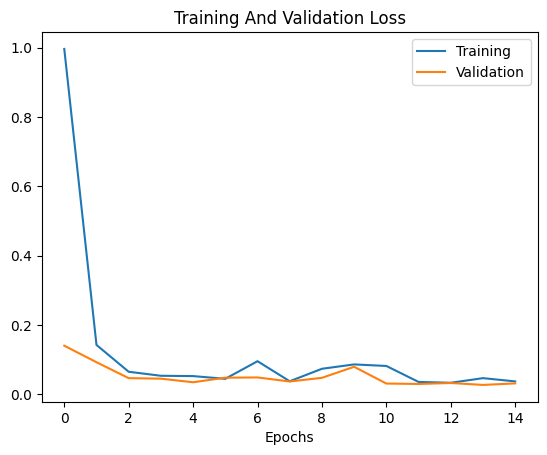

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [ ]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img("/content/drive/MyDrive/S6/TA/dataset/test1.png", target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn_model.predict(test_image)
print("The test_image is classified as", result[0])
print("The key and value associated are: 0=Riped, 1=Unriped")


1/1 [==============================] - 0s 61ms/step
The test_image is classified as [0.]
The key and value associated are: 0=Riped, 1=Unriped


In [ ]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img("/content/drive/MyDrive/S6/TA/dataset/test3.jpg", target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn_model.predict(test_image)
print("The test_image is classified as", result[0])
print("The key and value associated are: 0=Riped, 1=Unriped")


1/1 [==============================] - 0s 55ms/step
The test_image is classified as [1.]
The key and value associated are: 0=Riped, 1=Unriped
